#Introduction

##What is Voting?

Voting is an ensemble learning method that aggregates the predictions of a multitude of individual models in order to make a prediction.

In Voting, each model can be different, meaning that for a classification task, an ensemble of logistic regression, decision tree, and naive Bayes can be used. Because the result is an aggregate of the results of each of the individual models, the overall result is more robust and does not suffer from the weaknesses of each individual model.

##Hard Voting


In hard voting, each individual model will predict the output and then the majority prediction will be the overall output. For example, if there are 3 models in the ensemble and they predict heads, heads, tails, the output of the voting ensemble will be heads.



## Soft Voting

In contrast to hard voting, the outputs of each of the individual models in soft voting is a probability. The final prediction of the soft voting ensemble is then the prediction with the highest averag probability. For example, if there are 4 models in the ensemble and 2 models predict it will rain with probability 0.4 and 0.5 respectively and 2 models predict sunshine with probability 0.5 and 0.5, then the prediction of the ensemble will be sunshine because it has a higher average probability.

In [ ]:
range(2)

range(0, 2)

# Code

In [ ]:
# --- Install imbalanced-learn if needed ---
# !pip install -U imbalanced-learn

from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from google.colab import files
# Upload file
uploaded = files.upload()


Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes (1).csv


In [ ]:

# Get the filename

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)  # No need for encoding issues with Excel files
# --- Step 1: Convert categorical variables to numeric ---
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_numeric = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- Step 2: Split the dataset into training and test sets ---
X = df_numeric.drop(columns=['diabetes'])  # Target column
y = df_numeric['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 3: Standardize the data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Apply SMOTE to the training data ---
smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# --- Step 5: Define individual classifiers ---
log_reg = LogisticRegression(random_state=42, class_weight={0: 1, 1: 2})
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight={0: 1, 1: 2})
naive_bayes = GaussianNB()  # Doesn't support class_weight

# --- Step 6: Create and train a Voting Classifier ---
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('dt', decision_tree),
        ('nb', naive_bayes)
    ],
    voting='hard'  # Majority voting
)

voting_clf.fit(X_train_balanced, y_train_balanced)

# --- Step 7: Evaluate the model ---
y_pred = voting_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy:.4f}')


TypeError: VotingClassifier.__init__() got an unexpected keyword argument 'class_weight'

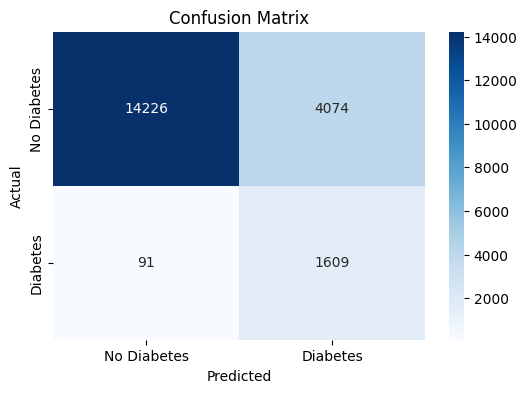

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()